In [40]:
##General imports we need for the project
import pandas as pd
import os
import env
import warnings
warnings.filterwarnings('ignore')
import numpy

##Imports for graphing
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
from graphviz import Graph

##Import prep and acquire functions
from acquire import get_telco_data
from prepare import prep_telco

##Import sklearn functinos
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split

##Import sklearn models
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import export_graphviz
from sklearn import tree

##Import sklearn metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

##Import statistics functinos
import scipy.stats as stats
from scipy.stats import mannwhitneyu

## Acquire the data

We will use functions to obtain our data.

**Get connection to SQL**

In [41]:
def get_connection(db, user=env.user, host=env.host, password=env.password):
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

**Get telco data**

In [42]:
def get_telco_data():
    filename = "telco_churn.csv"
    sql = '''SELECT *
        FROM customers 
        JOIN contract_types
        ON contract_types.contract_type_id = customers.contract_type_id
        JOIN internet_service_types
        ON internet_service_types.internet_service_type_id = customers.internet_service_type_id
        JOIN payment_types 
        ON payment_types.payment_type_id = customers.payment_type_id'''
    if os.path.isfile(filename):
        return pd.read_csv(filename)
    else:
        df = pd.read_sql(sql, get_connection('telco_churn'))
        return df

In [43]:
df = get_telco_data()

We will create a dictionary of our raw data for our `README.md` file.

In [44]:
details = {
    'Target' : ['churn'],
    'Dataype' : [df.dtypes['churn']],
    'Definition' : ['Whether or not a customer has churned'],
}

In [45]:
dictionary = {
    'Feature' : [
                'customer_id', 
                 'gender', 
                 'senior_citizen', 
                 'partner', 
                 'dependents', 
                 'tenure', 
                 'phone_service', 
                 'multiple_lines', 
                 'internet_service_type_id', 
                'online_security', 
                'online_backup', 
                'device_protection',
                'tech_support', 
                'streaming_tv', 
                'streaming_movies', 
                'contract_type_id', 
                'paperless_billing', 
                'payment_type_id', 
                'monthly_charges',
                'total_charges',
                'churn',
                'contract_type',
                'internet_service_type',
                'payment_type',
                ],
    'Dataype' : [
                df.dtypes['customer_id'], 
                 df.dtypes['gender'], 
                 df.dtypes['senior_citizen'],
                df.dtypes['partner'],
                 df.dtypes['dependents'], 
                 df.dtypes['tenure'], 
                 df.dtypes['phone_service'], 
                df.dtypes['multiple_lines'],
                 df.dtypes['internet_service_type_id'], 
                df.dtypes['online_security'], 
                df.dtypes['online_backup'], 
                df.dtypes['device_protection'],
                df.dtypes['tech_support'], 
                df.dtypes['streaming_tv'], 
                df.dtypes['streaming_movies'],
                df.dtypes['contract_type_id'], 
                df.dtypes['paperless_billing'], 
                df.dtypes['payment_type_id'], 
                df.dtypes['monthly_charges'],
                df.dtypes['total_charges'],
                df.dtypes['churn'],
                df.dtypes['contract_type'],
                df.dtypes['internet_service_type'],
                df.dtypes['payment_type'],
                ],
    'Definition' : ['Identification number for customer', 
                    'Customer gender, male or female', 
                    'Yes or no, is the customer a senior citizen', 
                    'Yes or no, does the customer customer has a parter', 
                    'Number of dependents a customer has', 
                    'Number of days a customer has been with the company', 
                    'Type of phone service plan a customer has', 
                    'Yes or no, does the customer have multiple lines', 
                    '1 for DSL, 2 for Fiber Optic, 3 for None', 
                    'Yes, no, or no internet service',
                    'Yes, no, or no internet service', 
                    'Yes, no, or no internet service',
                    'Yes, no, or no internet service', 
                    'Yes, no, or no internet service',
                    'Yes, no, or no internet service',
                    '1 for month-to-month, 2 for year, and 3 for two-year contract', 
                    'Yes or no, whether or not the customer uses paperless billing', 
                    '1 for electronic check, 2 for mailed check, 3 for automatic bank transfer, 4 for automatic credit card payment',
                    'Monthly charges the customer pays',
                    'Total charges the customer has paid',
                    'Yes or no, whether or not the customer has churned',
                    'Month-to-month, year, or two-year contract',
                    'DSL, Fiber Optic, or None',
                    'Electronic check, mailed check, automatic bank transfer, or automatic credit card payment',
                    ],
}

In [46]:
dict_churn = pd.DataFrame(details)

In [47]:
data_dictionary = pd.DataFrame(dictionary)

In [48]:
print(dict_churn.to_markdown(index=False))

| Target   | Dataype   | Definition                            |
|:---------|:----------|:--------------------------------------|
| churn    | object    | Whether or not a customer has churned |


In [49]:
print(data_dictionary.to_markdown(index=False))

| Feature                  | Dataype                           | Definition                                                                                                     |
|:-------------------------|:----------------------------------|:---------------------------------------------------------------------------------------------------------------|
| customer_id              | object                            | Identification number for customer                                                                             |
| gender                   | object                            | Customer gender, male or female                                                                                |
| senior_citizen           | int64                             | Yes or no, is the customer a senior citizen                                                                    |
| partner                  | object                            | Yes or no, does the customer customer has a p

Now we can begin to explore the data. First let's look at the dataframe itself.

In [50]:
df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,payment_type_id,monthly_charges,total_charges,churn,contract_type_id,contract_type,internet_service_type_id,internet_service_type,payment_type_id,payment_type
0,0016-QLJIS,Female,0,Yes,Yes,65,Yes,Yes,1,Yes,...,2,90.45,5957.9,No,3,Two year,1,DSL,2,Mailed check
1,0017-DINOC,Male,0,No,No,54,No,No phone service,1,Yes,...,4,45.20,2460.55,No,3,Two year,1,DSL,4,Credit card (automatic)
2,0019-GFNTW,Female,0,No,No,56,No,No phone service,1,Yes,...,3,45.05,2560.1,No,3,Two year,1,DSL,3,Bank transfer (automatic)
3,0056-EPFBG,Male,0,Yes,Yes,20,No,No phone service,1,Yes,...,4,39.40,825.4,No,3,Two year,1,DSL,4,Credit card (automatic)
4,0078-XZMHT,Male,0,Yes,No,72,Yes,Yes,1,No,...,3,85.15,6316.2,No,3,Two year,1,DSL,3,Bank transfer (automatic)


We will complete an inital data summarization using `info()`, `describe()`, and `value_counts()`.

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               7043 non-null   object 
 1   gender                    7043 non-null   object 
 2   senior_citizen            7043 non-null   int64  
 3   partner                   7043 non-null   object 
 4   dependents                7043 non-null   object 
 5   tenure                    7043 non-null   int64  
 6   phone_service             7043 non-null   object 
 7   multiple_lines            7043 non-null   object 
 8   internet_service_type_id  7043 non-null   int64  
 9   online_security           7043 non-null   object 
 10  online_backup             7043 non-null   object 
 11  device_protection         7043 non-null   object 
 12  tech_support              7043 non-null   object 
 13  streaming_tv              7043 non-null   object 
 14  streamin

In [52]:
df.describe()

,senior_citizen,tenure,internet_service_type_id,contract_type_id,payment_type_id,monthly_charges,contract_type_id,internet_service_type_id,payment_type_id
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,1.872923,1.690473,2.315633,64.761692,1.690473,1.872923,2.315633
std,0.368612,24.559481,0.737796,0.833755,1.148907,30.090047,0.833755,0.737796,1.148907
min,0.000000,0.000000,1.000000,1.000000,1.000000,18.250000,1.000000,1.000000,1.000000
25%,0.000000,9.000000,1.000000,1.000000,1.000000,35.500000,1.000000,1.000000,1.000000
50%,0.000000,29.000000,2.000000,1.000000,2.000000,70.350000,1.000000,2.000000,2.000000
75%,0.000000,55.000000,2.000000,2.000000,3.000000,89.850000,2.000000,2.000000,3.000000
max,1.000000,72.000000,3.000000,3.000000,4.000000,118.750000,3.000000,3.000000,4.000000


The `value_counts()` function will not work if we have duplicate columns, so we have to get rid of duplicate columns.

In [53]:
df = df.loc[:,~df.columns.duplicated()]

Now we can run a loop to determine the `value_counts()` for each column.

In [54]:
for c in df.columns:
    print ("---- %s ---" % c)
    print (df[c].value_counts())

---- customer_id ---
7995-ZHHNZ    1
6650-VJONK    1
1641-RQDAY    1
3192-LNKRK    1
5915-ANOEI    1
             ..
8204-TIFGJ    1
2074-GKOWZ    1
9625-RZFUK    1
1760-CAZHT    1
7054-LGEQW    1
Name: customer_id, Length: 7043, dtype: int64
---- gender ---
Male      3555
Female    3488
Name: gender, dtype: int64
---- senior_citizen ---
0    5901
1    1142
Name: senior_citizen, dtype: int64
---- partner ---
No     3641
Yes    3402
Name: partner, dtype: int64
---- dependents ---
No     4933
Yes    2110
Name: dependents, dtype: int64
---- tenure ---
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64
---- phone_service ---
Yes    6361
No      682
Name: phone_service, dtype: int64
---- multiple_lines ---
No                  3390
Yes                 2971
No phone service     682
Name: multiple_lines, dtype: int64
---- internet_service_type_id ---
2    3096
1    2421
3    1526
Name: internet_se

## Prepare the data

First we will make afunction that will split our data into `train`, `validate`, and `test`.

In [55]:
def split_data(df):
    '''
    take in a DataFrame and return train, validate, and test DataFrames; stratify on churn.
    return train, validate, test DataFrames.
    '''
    
    # splits df into train_validate and test using train_test_split() stratifying on churn to get an even mix of each churn, yes or no
    train_validate, test = train_test_split(df, test_size=.2, random_state=123, stratify=df.has_churned)
    
    # splits train_validate into train and validate using train_test_split() stratifying on churn to get an even mix of each churn
    train, validate = train_test_split(train_validate, 
                                       test_size=.3, 
                                       random_state=123, 
                                       stratify=train_validate.has_churned)
    return train, validate, test

In [56]:
def prep_telco(df):
    ## First we will get rid of duplicate columns
    df = df.loc[:,~df.columns.duplicated()]
    
    ##Add a numeric columns for churned or didn't churn
    df['has_churned'] = df['churn'].replace({'No' : 0, 'Yes': 1})
    
    ##Add a numerical column for paperless billing
    df['paperless_billing_numeric'] = df['paperless_billing'].replace({'No' : 0, 'Yes': 1})
    
    ## Now we will substitute the object values for dummy values that are easier to process. 
    dummy_df = pd.get_dummies(df[['partner', 'dependents', 'gender', 'phone_service', 'multiple_lines', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies']], drop_first=True)
    
    ##Concatenate our dummy values to our main Dataframe. 
    df = pd.concat([df, dummy_df], axis=1)
    
    ## Drop the redundant columns.
    df = df.drop(columns = ['gender', 'partner', 'dependents', 'phone_service', 'multiple_lines', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'contract_type', 'internet_service_type', 'payment_type', 'churn', 'paperless_billing'])
    
    ##Our column total_charges has some empty string values, so we will replace those values with a 0
    
    df["total_charges"] = df.total_charges.replace(" ", "0")
    
    ##Now we will convert the numbers in our total_charges and monthly_charges columns to floats. 
    df['total_charges'] = df.total_charges.astype(float)
    
    df['monthly_charges'] = df.monthly_charges.astype(float)
    
    ## Now we can split our data into train, validate, and test
    
     # split data into train, validate, test dfs
    train, validate, test = split_data(df)
    
    return train, validate, test

In [57]:
train, test, validate = prep_telco(df)

In [58]:
train.columns

Index(['customer_id', 'senior_citizen', 'tenure', 'internet_service_type_id',
       'contract_type_id', 'payment_type_id', 'monthly_charges',
       'total_charges', 'has_churned', 'paperless_billing_numeric',
       'partner_Yes', 'dependents_Yes', 'gender_Male', 'phone_service_Yes',
       'multiple_lines_No phone service', 'multiple_lines_Yes',
       'online_security_No internet service', 'online_security_Yes',
       'online_backup_No internet service', 'online_backup_Yes',
       'device_protection_No internet service', 'device_protection_Yes',
       'tech_support_No internet service', 'tech_support_Yes',
       'streaming_tv_No internet service', 'streaming_tv_Yes',
       'streaming_movies_No internet service', 'streaming_movies_Yes'],
      dtype='object')

In [59]:
train.head()

,customer_id,senior_citizen,tenure,internet_service_type_id,contract_type_id,payment_type_id,monthly_charges,total_charges,has_churned,paperless_billing_numeric,...,online_backup_No internet service,online_backup_Yes,device_protection_No internet service,device_protection_Yes,tech_support_No internet service,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes
5642,1982-FEBTD,0,23,3,3,4,25.60,514.75,0,1,...,1,0,1,0,1,0,1,0,1,0
3338,8982-NHAVY,0,27,2,2,3,100.50,2673.45,0,1,...,0,0,0,1,0,0,0,1,0,1
4273,4115-NZRKS,1,7,2,1,1,89.15,574.35,0,1,...,0,0,0,0,0,0,0,1,0,1
2382,9633-DENPU,0,47,1,1,3,58.60,2723.40,0,1,...,0,1,0,0,0,0,0,1,0,0
2655,5693-PIPCS,0,41,2,3,4,99.65,4220.35,0,1,...,0,1,0,0,0,1,0,1,0,1


We will prepare a dictionary of our data after we have cleaned it.

In [60]:
dictionary_clean_data = {
    'Feature' : [
                'customer_id', 
                'senior_citizen', 
                'tenure',
                'internet_service_type_id', 
                'contract_type_id',
                'payment_type_id', 
                'monthly_charges',
                'total_charges',
                'has_churned',
                'paperless_billing_numeric',
                'partner_Yes',
                'dependents_Yes',
                'gender_Male',
                'phone_service_Yes',
                'multiple_lines_No phone service',
                'online_security_No internet service',
                'online_security_Yes', 
                'online_backup_No internet service', 
                'online_backup_Yes', 
                'device_protection_No internet service', 
                'device_protection_Yes', 
                'tech_support_No internet service', 
                'tech_support_Yes', 
                'streaming_tv_No internet service', 
                'streaming_tv_Yes', 
                'streaming_movies_No internet service', 
                'streaming_movies_Yes',
                ],
    'Dataype' : [
                train.dtypes['customer_id'], 
                train.dtypes['senior_citizen'],
                train.dtypes['tenure'],
                train.dtypes['internet_service_type_id'],
                train.dtypes['contract_type_id'],
                train.dtypes['payment_type_id'],
                train.dtypes['monthly_charges'],
                train.dtypes['total_charges'],
                train.dtypes['has_churned'],
                train.dtypes['paperless_billing_numeric'],
                train.dtypes['partner_Yes'],
                train.dtypes['dependents_Yes'],
                train.dtypes['gender_Male'],
                train.dtypes['phone_service_Yes'],
                train.dtypes['multiple_lines_No phone service'],
                train.dtypes['online_security_No internet service'],
                train.dtypes['online_security_Yes'],
                train.dtypes['online_backup_No internet service'],
                train.dtypes['online_backup_Yes'],
                train.dtypes['device_protection_No internet service'], 
                train.dtypes['device_protection_Yes'],
                train.dtypes['tech_support_No internet service'],
                train.dtypes['tech_support_Yes'],
                train.dtypes['streaming_tv_No internet service'],
                train.dtypes['streaming_tv_Yes'],
                train.dtypes['streaming_movies_No internet service'],
                train.dtypes['streaming_movies_Yes'],
                ],
    'Definition' : [
                    'Identification number for customer', 
                    '0 for not senior citizen, 1 for senior citizen', 
                    'Months the customer has been with the company',
                    '1 for DSL, 2 for Fiber Optic, 3 for None', 
                    '1 for month-to-month, 2 for year, and 3 for two-year contract', 
                    '1 for electronic check, 2 for mailed check, 3 for automatic bank transfer, 4 for automatic credit card payment',
                    'Charges a customer pays per months',
                    'Total charges a customer has paid',
                    '0 for has not churned, 1 for has churned',
                    '0 for non-paperless billing, 1 for paperless billing',
                    '0 for no partner, 1 for has partner',
                    '0 for no dependents, 1 for has dependents',
                    '0 for female, 1 for male',
                    '0 for no phone service, 1 for phone service',
                    '0 for phone service, 1 for no phone service',
                    '0 for internet service, 1 for no internet service',
                    '0 for no online security, 1 for online security',
                    '0 for internet service, 1 for no internet service',
                    '0 for no online backup, 1 for online backup',
                    '0 for internet service, 1 for no internet service',
                    '0 for no device protection, 1 for device protection',
                    '0 for internet service, 1 for no internet service',
                    '0 for no tech support, 1 for tech support',
                    '0 for internet service, 1 for no internet service',
                    '0 for no streaming TV, 1 for streaming TV',
                    '0 for internet service, 1 for no internet service',
                    '0 for no streaming movies, 1 for streaming movies',
                    ],
}

In [61]:
df_clean_data = pd.DataFrame(dictionary_clean_data)

In [62]:
print(df_clean_data.to_markdown(index=False))

| Feature                               | Dataype   | Definition                                                                                                     |
|:--------------------------------------|:----------|:---------------------------------------------------------------------------------------------------------------|
| customer_id                           | object    | Identification number for customer                                                                             |
| senior_citizen                        | int64     | 0 for not senior citizen, 1 for senior citizen                                                                 |
| tenure                                | int64     | Months the customer has been with the company                                                                  |
| internet_service_type_id              | int64     | 1 for DSL, 2 for Fiber Optic, 3 for None                                                                       

## Initial Hypothesis Testing

For all of the following hypotheses we will set $\alpha = 0.05 $. 

### Hypothesis 1

**Formulate hypotheses**

$H_0$: There is no difference in the churn rate for customers on month-to-month contracts and the churn rate for customers on either year or two-year contracts. 

$H_a$: There is a significant difference in the churn rate for customers on month-to-month contracts and the churn rate for customers on either year or two-yera contracts. 

**Get data**

In [63]:
month_to_month_customers = train[train.contract_type_id == 1]

In [64]:
year_and_two_year_customers = train[train.contract_type_id != 1]

**Compute p value and test statistic**

In [65]:
tstat, p = stats.ttest_ind(month_to_month_customers.has_churned, year_and_two_year_customers.has_churned)

In [66]:
tstat

28.150653344431294

In [67]:
p

4.950197678770975e-159

**Make a conclusion based on our data**

Since our p value is less than 0.05, we can conclude that there is a significant difference between the month-to-month customer churn rate and the year-to-year and two-year customer churn rates. 

**Chart indicating correlation**

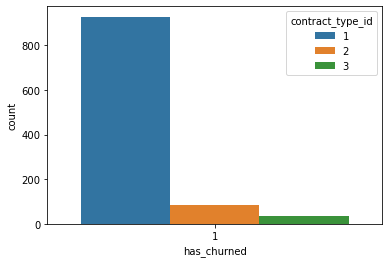

In [68]:
churn_counts_by_contract = sns.countplot(x='has_churned', data=train[train.has_churned == 1], hue = "contract_type_id")

### Hypothesis 2

**Formulate hypotheses**

$H_0$: There is no correlation between customer churn rate and monthly charges. 

$H_a$: There is a correlation between customer churn rate and monthly charges.

**Get data**

In [69]:
churn_rate = train.has_churned
monthly_charges = train.monthly_charges

**Compute p value and correlation**

In [70]:
corr, p = stats.pearsonr(churn_rate, monthly_charges)
corr, p

(0.18903970957264357, 4.816687112552436e-33)

**Make conclusion based on our data**

Our p-value is less than 0.05. We reject the null hypothesis and conclude that churn rate and monthly charges are correlated.

**Chart indicating correlation**

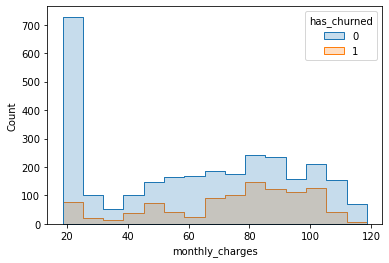

In [71]:
churn_by_monthly_charges = sns.histplot(
    x=train.monthly_charges, hue=train.has_churned, element = 'step'
)

**We need the following data for our next hypotheses**

In [72]:
train_has_churned = train[train.has_churned == 1]

In [73]:
train_no_churn = train[train.has_churned == 0]

### Hypothesis 3

**Formulate hypotheses**

$H_0$: There is no significant difference between the mean tenure for customers who didn't churn and customers who did churn. 

$H_a$: There is a significant difference between the mean tenure for customers who churned and customers who did churn. 

**Compute statistic and p value**

In [74]:
stats.mannwhitneyu(train_has_churned['tenure'], train_no_churn['tenure'], use_continuity=True)

MannwhitneyuResult(statistic=787745.5, pvalue=5.978994288055496e-118)

Because our p value is less than 0.05, we conclude that the mean tenure for customers who churned is signficantly different from the mean tenure for customers who didn't churn. 

**Graph**

<AxesSubplot:xlabel='tenure', ylabel='Count'>

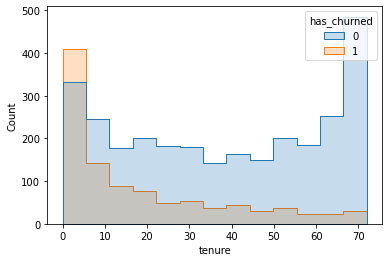

In [75]:
sns.histplot(x=train.tenure, hue=train.has_churned, element = 'step')

### Hypothesis 4

**Formulate hypotheses**

$H_0$: There is no significant difference in mean monthly charges for customers who have churned and customers who have not churned. 

$H_a$: There is a significant difference in mean monthly charges for customers who have churned and customers who have not churned.

**Compute statistic and p value**

In [76]:
stats.mannwhitneyu(train_has_churned['monthly_charges'], train_no_churn['monthly_charges'], use_continuity=True)

MannwhitneyuResult(statistic=1160715.0, pvalue=1.4455529063493655e-29)

Because our p value is less than 0.05, we reject the null hypothesis and conclude that mean monthly charges for customers who have churned are significantly different from mean monthly charges for customers who have not churned.

**Graph**

<AxesSubplot:xlabel='monthly_charges', ylabel='Count'>

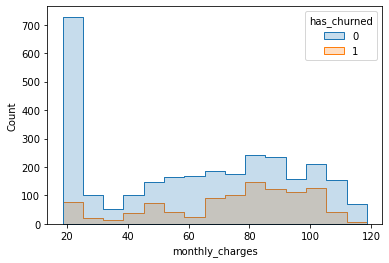

In [77]:
sns.histplot(x=train.monthly_charges, hue = train.has_churned, element = 'step')

### Hypothesis 5

**Formulate hypotheses**

$H_0$: There is no significant correlation between customer churn rates and contract type.

$H_a$: There is a significant correlation between customer churn rates and contract type.

In [78]:
churn_rate = train.has_churned
contract_type = train.contract_type_id

**Compute statistic and p value**

In [79]:
corr, p = stats.pearsonr(churn_rate, contract_type)
corr, p

(-0.3961558393959263, 2.572502613430288e-148)

Because our p-value is less than 0.05, we reject the null hypothesis that is no significant correlation between customer churn rates and contract type.

**Graph**

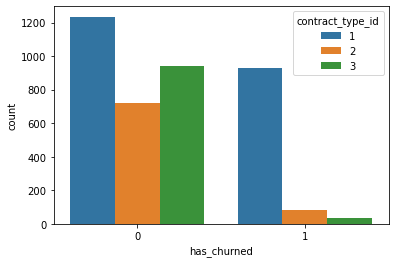

In [80]:
churn_counts_by_contract = sns.countplot(x='has_churned', data=train, hue = "contract_type_id")

### Hypothesis 6

**Formulate hypotheses**

$H_0$: There is no significant correlation between churn rate and payment type ID.

$H_a$: There is a significant correlation between churn rate and payment type ID. 

**Calculate statistic and p value**

In [81]:
corr, p = stats.pearsonr(churn_rate, train.payment_type_id)
corr, p

(-0.2555831035581517, 7.653586167832065e-60)

Because or p-value is less than 0.05, we reject the null hypothesis that there is no significant correlation between churn rate and payment type.

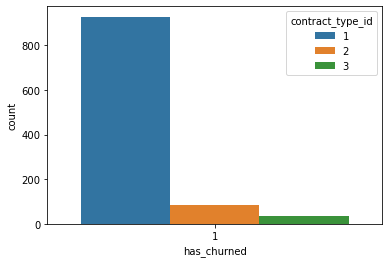

In [82]:
churn_rates_counts_by_contract = sns.countplot(x='has_churned', data=train[train.has_churned == 1], hue = "contract_type_id")

### Hypothesis 7

**Formulate hypotheses**

$H_0$: There is no significant correlation between internet service type ID and churn rate.

$H_a$: There is a significant correlation between internet service type ID and churn rate.

**Calculate statistic and p value**

In [83]:
corr, p = stats.pearsonr(churn_rate, train.internet_service_type_id)
corr, p

(-0.043897298986751675, 0.0058350104960837165)

Because our p value is less than 0.05, we reject the null hypothesis that there is no significant correlation between churn rate and internet service type ID.

**Graph**

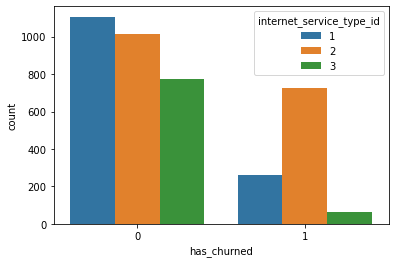

In [84]:
churn_counts_by_internet_service = sns.countplot(x='has_churned', data=train, hue = "internet_service_type_id")

## Conclusions and Key Takeaways

Based on our hypothesis testing, we conclude the following variables warrant further exploration for correlation with churn: 
 - `contract_type_id` 
 - `monthly_charges`
 - `tenure`
 - `payment_type_id`

The variable `internet_service_type_id` does not warrant furhter exploration for correlation with churn.
 

## Split data into X_train and y_train

We will split our data into `X_train` and `y_train` so that we can run the data in our models.

In [85]:
X_train, y_train = train.drop(columns='has_churned'), train.has_churned
X_validate, y_validate = validate.drop(columns='has_churned'), validate.has_churned
X_test, y_test = test.drop(columns='has_churned'), test.has_churned

## Baseline Accuracy

We will establish a baseline accuracy to compare to the accuracy of our models.

In [86]:
train.has_churned.value_counts()

0    2897
1    1046
Name: has_churned, dtype: int64

The majority of our customers have not churned, so our baseliene assumption is that cutsomers will not churn.

In [87]:
model = DummyClassifier(strategy= 'constant', constant = 0)

In [88]:
model.fit(X_train, y_train)

DummyClassifier(constant=0, strategy='constant')

In [89]:
accuracy = round(model.score(X_train, y_train), 2)
print(f'Training accuracy: {accuracy}')

Training accuracy: 0.73


We will now compare the baseline accuracy to the accuracy of different models.

## Decision Tree

To run our train data through the model, we need to drop customer id. 

In [90]:
X_train = X_train.drop(columns = ['customer_id'])

In [91]:
X_validate = X_validate.drop(columns = ['customer_id'])

We will start with a Decision Tree of max depth 3.

In [92]:
clf1 = DecisionTreeClassifier(max_depth=3, random_state=123)

Fit the data.

In [93]:
clf1 = clf1.fit(X_train, y_train)

In [94]:
clf1

DecisionTreeClassifier(max_depth=3, random_state=123)

Print a decision tree.

In [95]:
dot_data = export_graphviz(clf1, feature_names= X_train.columns, rounded=True, filled=True, out_file=None)
graph = graphviz.Source(dot_data) 

graph.render('telco_tree_1', view=True)

'telco_tree_1.pdf'

The tree indicates to us that the main predictor of churn is contract type. Customers with contract type ID 1 are more likely to churn than customers with contract type ID 2 and 3.

Of customers who have contract type iD one, the biggest predictor of churn is monthly charges less than 64.43.

3 is a year contract, 2 is yearly, 1 is month to month

### Probability of churn

**Train dataset**

In [96]:
y_pred = clf1.predict(X_train)

In [97]:
y_pred_proba = clf1.predict_proba(X_train)

In [98]:
y_probability = pd.DataFrame(y_pred_proba)
y_probability.head()

,0,1
0,0.983914,0.016086
1,0.808442,0.191558
2,0.254808,0.745192
3,0.793834,0.206166
4,0.808442,0.191558


**Validate dataset**

In [99]:
y_pred_validate = clf1.predict(X_validate)

### Evaluate in-sample results

#### Accuracy score

In [100]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf1.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.79


#### Confusion Matrix

In [101]:
confusion_matrix(y_train, y_pred)

array([[2791,  106],
       [ 736,  310]])

In [102]:
labels1 = ['no_churn_actual', 'churn_actual']
labels2 = ['no_churn_predicted', 'churn_predicted']

pd.DataFrame(confusion_matrix(y_train, y_pred), index = labels1, columns = labels2)

,no_churn_predicted,churn_predicted
no_churn_actual,2791,106
churn_actual,736,310


### Classification Report

**Train dataset**

In [103]:
classification_report_churn = pd.DataFrame(classification_report(y_train, y_pred, output_dict = True)).T

In [104]:
classification_report_churn

,precision,recall,f1-score,support
0,0.791324,0.963410,0.868929,2897.000000
1,0.745192,0.296367,0.424077,1046.000000
accuracy,0.786457,0.786457,0.786457,0.786457
macro avg,0.768258,0.629889,0.646503,3943.000000
weighted avg,0.779086,0.786457,0.750918,3943.000000


**Validate dataset**

In [105]:
classification_report_churn_validate = pd.DataFrame(classification_report(y_validate, y_pred_validate, output_dict = True)).T
classification_report_churn_validate

,precision,recall,f1-score,support
0,0.779014,0.946860,0.854775,1035.000000
1,0.635762,0.256684,0.365714,374.000000
accuracy,0.763662,0.763662,0.763662,0.763662
macro avg,0.707388,0.601772,0.610245,1409.000000
weighted avg,0.740990,0.763662,0.724961,1409.000000


This model beats our baseline accuracy of `0.73` for train and validate. Let's see what happens when we differ the max depth of our decision tree.

**Train dataset**

In [106]:
clf2 = DecisionTreeClassifier(max_depth=4, random_state=123)

In [107]:
clf2 = clf2.fit(X_train, y_train)

In [108]:
dot_data = export_graphviz(clf2, feature_names= X_train.columns, rounded=True, filled=True, out_file=None)
graph = graphviz.Source(dot_data) 

graph.render('telco_tree_2', view=True)

'telco_tree_2.pdf'

In [109]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf2.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.79


In [110]:
y_pred_2 = clf2.predict(X_train)

In [111]:
classification_report_churn = pd.DataFrame(classification_report(y_train, y_pred_2, output_dict = True)).T

In [112]:
classification_report_churn

,precision,recall,f1-score,support
0,0.812954,0.927166,0.866312,2897.000000
1,0.669797,0.409178,0.508012,1046.000000
accuracy,0.789754,0.789754,0.789754,0.789754
macro avg,0.741375,0.668172,0.687162,3943.000000
weighted avg,0.774977,0.789754,0.771262,3943.000000


**Validate dataset**

In [113]:
y_pred_2_validate = clf2.predict(X_validate)
classification_report_churn_validate = pd.DataFrame(classification_report(y_validate, y_pred_2_validate, output_dict = True)).T
classification_report_churn_validate

,precision,recall,f1-score,support
0,0.811468,0.902415,0.854529,1035.000000
1,0.608527,0.419786,0.496835,374.000000
accuracy,0.774308,0.774308,0.774308,0.774308
macro avg,0.709998,0.661101,0.675682,1409.000000
weighted avg,0.757600,0.774308,0.759584,1409.000000


Using a max depth of four increases our accuracy, but decreaes our precision and recall. Let's look at max depth 5.

**Train dataset**

In [114]:
clf3 = DecisionTreeClassifier(max_depth=5, random_state=123)
clf3 = clf3.fit(X_train, y_train)
dot_data = export_graphviz(clf3, feature_names= X_train.columns, rounded=True, filled=True, out_file=None)
graph = graphviz.Source(dot_data) 

graph.render('telco_tree_3', view=True)

'telco_tree_3.pdf'

In [115]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf3.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.79


In [116]:
y_pred_3 = clf3.predict(X_train)

In [117]:
classification_report_churn = pd.DataFrame(classification_report(y_train, y_pred_3, output_dict = True)).T

In [118]:
classification_report_churn

,precision,recall,f1-score,support
0,0.843915,0.880911,0.862017,2897.000000
1,0.624592,0.548757,0.584224,1046.000000
accuracy,0.792797,0.792797,0.792797,0.792797
macro avg,0.734254,0.714834,0.723120,3943.000000
weighted avg,0.785733,0.792797,0.788324,3943.000000


In [119]:
y_pred_3_validate = clf3.predict(X_validate)
classification_report_churn_validate = pd.DataFrame(classification_report(y_validate, y_pred_3_validate, output_dict = True)).T
classification_report_churn_validate

,precision,recall,f1-score,support
0,0.840566,0.860870,0.850597,1035.000000
1,0.587393,0.548128,0.567082,374.000000
accuracy,0.777857,0.777857,0.777857,0.777857
macro avg,0.713979,0.704499,0.708839,1409.000000
weighted avg,0.773365,0.777857,0.775341,1409.000000


Precision increases, recall decreases using max depth 5.

## Random forest

In [120]:
from sklearn.ensemble import RandomForestClassifier

In [121]:
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=1,
                            n_estimators=100,
                            max_depth=10, 
                            random_state=123)

### Fit the model

In [122]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=123)

### Feature importance

In [123]:
feature_importances = pd.DataFrame(rf.feature_importances_, index = X_train.columns, columns = [ "relative importance"])

In [124]:
feature_importances = feature_importances.sort_values(by = ['relative importance'], ascending = False)

In [125]:
feature_importances.columns.names = ['category']

In [126]:
feature_importances

category,relative importance
total_charges,0.169107
tenure,0.165327
monthly_charges,0.130737
contract_type_id,0.126100
payment_type_id,0.077776
internet_service_type_id,0.038534
tech_support_Yes,0.031048
online_security_Yes,0.029296
paperless_billing_numeric,0.024660
multiple_lines_Yes,0.019738


In [127]:
most_important_features = feature_importances.head(3)

In [128]:
print(most_important_features.to_markdown())

|                 |   relative importance |
|:----------------|----------------------:|
| total_charges   |              0.169107 |
| tenure          |              0.165327 |
| monthly_charges |              0.130737 |


The above chart indicates to us that the most important values for predicting churn are: **tenure**, **monthly charges**, **contract type**, and **payment type**.

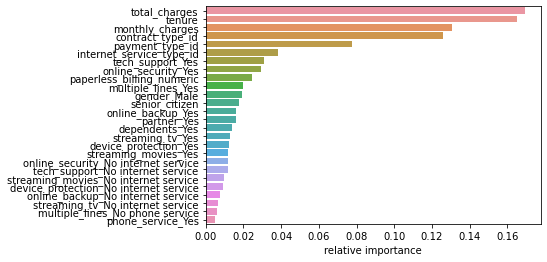

In [129]:
relative_importances = sns.barplot(x=feature_importances['relative importance'], y=feature_importances.index)

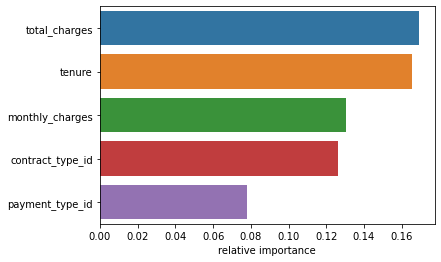

In [130]:
relative_importances = sns.barplot(x=feature_importances['relative importance'][0:5], y=feature_importances.index[0:5])

### Make predictions

**Train dataset**

In [131]:
y_pred = rf.predict(X_train)

In [132]:
pd.DataFrame(y_pred)

,0
0,0
1,0
2,1
3,0
4,0
...,...
3938,1
3939,0
3940,0
3941,0


**Validate dataset**

In [133]:
y_pred_validate = rf.predict(X_validate)

### Estimate probability

**Train dataset**

In [134]:
y_pred_proba = rf.predict_proba(X_train)

In [135]:
pd.DataFrame(y_pred_proba)

,0,1
0,0.992901,0.007099
1,0.819419,0.180581
2,0.430128,0.569872
3,0.856511,0.143489
4,0.907393,0.092607
...,...,...
3938,0.445981,0.554019
3939,0.970890,0.029110
3940,0.591730,0.408270
3941,0.806280,0.193720


**Validate dataset**

In [136]:
y_pred_proba_validate = rf.predict_proba(X_validate)

#### Accuracy

In [137]:
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))

Accuracy of random forest classifier on training set: 0.90


In [138]:
print('Accuracy of random forest classifier on validate set: {:.2f}'
     .format(rf.score(X_validate, y_validate)))

Accuracy of random forest classifier on validate set: 0.81


#### Confusion matrix

In [139]:
labels1 = ['did not churn actual', 'churned actual']
labels2 = ['did not churn predicted', 'churned predicted']
df_confusion_matrix = pd.DataFrame(confusion_matrix(y_train, y_pred), index=labels1, columns=labels2)

In [140]:
df_confusion_matrix

,did not churn predicted,churned predicted
did not churn actual,2771,126
churned actual,280,766


#### Classification Report

In [141]:
classification_report_2 = classification_report(y_train, y_pred, output_dict = True)

In [142]:
df_classification_report_2 = pd.DataFrame(classification_report_2).T

In [143]:
df_classification_report_2

,precision,recall,f1-score,support
0,0.908227,0.956507,0.931742,2897.000000
1,0.858744,0.732314,0.790506,1046.000000
accuracy,0.897033,0.897033,0.897033,0.897033
macro avg,0.883486,0.844410,0.861124,3943.000000
weighted avg,0.895100,0.897033,0.894275,3943.000000


In [144]:
classification_report_2_validate = classification_report(y_validate, y_pred_validate, output_dict = True)
df_classification_report_2_validate = pd.DataFrame(classification_report_2_validate).T
df_classification_report_2_validate

,precision,recall,f1-score,support
0,0.853726,0.896618,0.874647,1035.000000
1,0.667702,0.574866,0.617816,374.000000
accuracy,0.811214,0.811214,0.811214,0.811214
macro avg,0.760714,0.735742,0.746231,1409.000000
weighted avg,0.804348,0.811214,0.806474,1409.000000


Let's try the random forest model with max depth 3. 

In [145]:
rf2 = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=1,
                            n_estimators=100,
                            max_depth=3, 
                            random_state=123)

In [146]:
rf2.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, random_state=123)

**Training dataset**

In [147]:
y_pred_rf2 = rf2.predict(X_train)

In [148]:
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf2.score(X_train, y_train)))

Accuracy of random forest classifier on training set: 0.79


In [149]:
classification_report_3 = classification_report(y_train, y_pred_rf2, output_dict = True)

In [150]:
df_classification_report_3 = pd.DataFrame(classification_report_3).T

In [151]:
df_classification_report_3

,precision,recall,f1-score,support
0,0.797578,0.954781,0.869128,2897.00000
1,0.724211,0.328872,0.452334,1046.00000
accuracy,0.788740,0.788740,0.788740,0.78874
macro avg,0.760894,0.641826,0.660731,3943.00000
weighted avg,0.778115,0.788740,0.758561,3943.00000


In [152]:
y_pred_rf2_validate = rf2.predict(X_validate)
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf2.score(X_validate, y_validate)))

Accuracy of random forest classifier on training set: 0.78


In [153]:
classification_report_3_validate = classification_report(y_validate, y_pred_rf2_validate, output_dict = True)
df_classification_report_3_validate = pd.DataFrame(classification_report_3_validate).T
df_classification_report_3_validate

,precision,recall,f1-score,support
0,0.794643,0.945894,0.863697,1035.000000
1,0.683616,0.323529,0.439201,374.000000
accuracy,0.780696,0.780696,0.780696,0.780696
macro avg,0.739129,0.634712,0.651449,1409.000000
weighted avg,0.765172,0.780696,0.751020,1409.000000


Precision and accuracy decrease when use max depth 3, versus max depth 10. Let's see what happens when we differ the amount of `n_estimators`.

In [154]:
rf3 = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=1,
                            n_estimators=150,
                            max_depth=10, 
                            random_state=123)

In [155]:
rf3.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=150, random_state=123)

In [156]:
y_pred_rf3 = rf3.predict(X_train)

In [157]:
y_pred_rf3_validate = rf3.predict(X_validate)

In [158]:
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf3.score(X_train, y_train)))

Accuracy of random forest classifier on training set: 0.90


In [159]:
classification_report_4 = classification_report(y_train, y_pred_rf3, output_dict = True)
df_classification_report_4 = pd.DataFrame(classification_report_4).T
df_classification_report_4

,precision,recall,f1-score,support
0,0.907778,0.954781,0.930686,2897.000000
1,0.853795,0.731358,0.787848,1046.000000
accuracy,0.895511,0.895511,0.895511,0.895511
macro avg,0.880786,0.843069,0.859267,3943.000000
weighted avg,0.893457,0.895511,0.892794,3943.000000


In [160]:
classification_report_4_validate = classification_report(y_validate, y_pred_rf3_validate, output_dict = True)
df_classification_report_4_validate = pd.DataFrame(classification_report_4_validate).T
df_classification_report_4_validate

,precision,recall,f1-score,support
0,0.856221,0.897585,0.876415,1035.000000
1,0.672840,0.582888,0.624642,374.000000
accuracy,0.814053,0.814053,0.814053,0.814053
macro avg,0.764530,0.740236,0.750528,1409.000000
weighted avg,0.807545,0.814053,0.809585,1409.000000


Increases esitmators give us precision, recall, and accuracy comparable to our first Random Forest model.

## K-nearest neighbor

**Create KNN Object**

In [161]:
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')

**Fit the model**

In [162]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

**Make predictions**

In [163]:
y_pred = knn.predict(X_train)

In [164]:
y_pred_validate = knn.predict(X_validate)

**Classification report**

In [165]:
pd.DataFrame(classification_report(y_train, y_pred, output_dict = True)).T

,precision,recall,f1-score,support
0,0.857143,0.925785,0.890143,2897.000000
1,0.735872,0.572658,0.644086,1046.000000
accuracy,0.832108,0.832108,0.832108,0.832108
macro avg,0.796508,0.749222,0.767114,3943.000000
weighted avg,0.824972,0.832108,0.824869,3943.000000


In [166]:
pd.DataFrame(classification_report(y_validate, y_pred_validate, output_dict = True)).T

,precision,recall,f1-score,support
0,0.815718,0.872464,0.843137,1035.000000
1,0.562914,0.454545,0.502959,374.000000
accuracy,0.761533,0.761533,0.761533,0.761533
macro avg,0.689316,0.663505,0.673048,1409.000000
weighted avg,0.748615,0.761533,0.752841,1409.000000


Let's try the knn model with 10 neighbors.

In [167]:
knn2 = KNeighborsClassifier(n_neighbors=10, weights='uniform')
knn2.fit(X_train, y_train)
y_pred2 = knn2.predict(X_train)
pd.DataFrame(classification_report(y_train, y_pred2, output_dict = True)).T

,precision,recall,f1-score,support
0,0.819833,0.950293,0.880256,2897.000000
1,0.753846,0.421606,0.540773,1046.000000
accuracy,0.810043,0.810043,0.810043,0.810043
macro avg,0.786840,0.685950,0.710514,3943.000000
weighted avg,0.802328,0.810043,0.790198,3943.000000


In [168]:
y_pred2_validate = knn2.predict(X_validate)
pd.DataFrame(classification_report(y_validate, y_pred2_validate, output_dict = True)).T

,precision,recall,f1-score,support
0,0.799832,0.922705,0.856886,1035.000000
1,0.627907,0.360963,0.458404,374.000000
accuracy,0.773598,0.773598,0.773598,0.773598
macro avg,0.713870,0.641834,0.657645,1409.000000
weighted avg,0.754197,0.773598,0.751115,1409.000000


Increasing neighbors decreases precision, recall and accuracy. Let's try the knn model with 7 neighbors. 

In [169]:
knn3 = KNeighborsClassifier(n_neighbors=10, weights='uniform')
knn3.fit(X_train, y_train)
y_pred3 = knn3.predict(X_train)
pd.DataFrame(classification_report(y_train, y_pred3, output_dict = True)).T

,precision,recall,f1-score,support
0,0.819833,0.950293,0.880256,2897.000000
1,0.753846,0.421606,0.540773,1046.000000
accuracy,0.810043,0.810043,0.810043,0.810043
macro avg,0.786840,0.685950,0.710514,3943.000000
weighted avg,0.802328,0.810043,0.790198,3943.000000


In [170]:
y_pred3_validate = knn3.predict(X_validate)
pd.DataFrame(classification_report(y_validate, y_pred3_validate, output_dict = True)).T

,precision,recall,f1-score,support
0,0.799832,0.922705,0.856886,1035.000000
1,0.627907,0.360963,0.458404,374.000000
accuracy,0.773598,0.773598,0.773598,0.773598
macro avg,0.713870,0.641834,0.657645,1409.000000
weighted avg,0.754197,0.773598,0.751115,1409.000000


Again, our model with the highest accuracy, precision, and recall is the knn model with 5 neighbors.

## Chosing the best model

The `random forest` model performs with high accuracy, precision, and recall. Also, due to feature importance, this model gives us usable data. Furthermore, we want a model with high recall because want to capture all customers that actually churned. The random forest with max depth 10 offers us high recall, while still maintaining high accuracy and precision.

We will test this model and the test dataset.

To use the model on our test dataset, we need to drop the `customer_id` column from our `X_test` data.

In [171]:
X_test_no_id = X_test.drop(columns = ['customer_id'])

In [172]:
y_pred_rf_test = rf.predict(X_test_no_id)

In [173]:
classification_report_test = pd.DataFrame(classification_report(y_test, y_pred_rf_test, output_dict = True)).T

In [174]:
classification_report_test

,precision,recall,f1-score,support
0,0.838444,0.902576,0.869329,1242.00000
1,0.658192,0.518931,0.580324,449.00000
accuracy,0.800710,0.800710,0.800710,0.80071
macro avg,0.748318,0.710754,0.724826,1691.00000
weighted avg,0.790583,0.800710,0.792592,1691.00000


## Create predictions CSV

In [175]:
proba_test = rf2.predict_proba(X_test_no_id)

In [342]:
proba_df = pd.DataFrame(proba_test, columns=rf2.classes_.tolist())
proba_df.head()

,0,1
0,0.579144,0.420856
1,0.392773,0.607227
2,0.675248,0.324752
3,0.966956,0.033044
4,0.591087,0.408913


In [343]:
reset_test = X_test.reset_index()
reset_test.head()

,index,customer_id,senior_citizen,tenure,internet_service_type_id,contract_type_id,payment_type_id,monthly_charges,total_charges,paperless_billing_numeric,...,online_backup_No internet service,online_backup_Yes,device_protection_No internet service,device_protection_Yes,tech_support_No internet service,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes
0,1630,3668-QPYBK,0,2,1,1,2,53.85,108.15,1,...,0,1,0,0,0,0,0,0,0,0
1,5181,8380-PEFPE,0,1,2,1,1,71.65,71.65,1,...,0,0,0,0,0,0,0,0,0,0
2,4239,3956-CJUST,1,23,2,1,3,75.40,1643.55,1,...,0,0,0,0,0,0,0,0,0,0
3,5814,4652-ODEVH,0,45,3,3,2,24.45,1088.25,0,...,1,0,1,0,1,0,1,0,1,0
4,1438,2100-BDNSN,0,5,1,1,3,67.95,350.30,0,...,0,0,0,1,0,1,0,1,0,0


In [344]:
test_proba_df = pd.concat([reset_test, proba_df], axis=1)
test_proba_df.head()

,index,customer_id,senior_citizen,tenure,internet_service_type_id,contract_type_id,payment_type_id,monthly_charges,total_charges,paperless_billing_numeric,...,device_protection_No internet service,device_protection_Yes,tech_support_No internet service,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,0,1
0,1630,3668-QPYBK,0,2,1,1,2,53.85,108.15,1,...,0,0,0,0,0,0,0,0,0.579144,0.420856
1,5181,8380-PEFPE,0,1,2,1,1,71.65,71.65,1,...,0,0,0,0,0,0,0,0,0.392773,0.607227
2,4239,3956-CJUST,1,23,2,1,3,75.40,1643.55,1,...,0,0,0,0,0,0,0,0,0.675248,0.324752
3,5814,4652-ODEVH,0,45,3,3,2,24.45,1088.25,0,...,1,0,1,0,1,0,1,0,0.966956,0.033044
4,1438,2100-BDNSN,0,5,1,1,3,67.95,350.30,0,...,0,1,0,1,0,1,0,0,0.591087,0.408913


In [345]:
test_proba_df['predicted'] = y_pred_rf2_test
test_proba_df.head()

,index,customer_id,senior_citizen,tenure,internet_service_type_id,contract_type_id,payment_type_id,monthly_charges,total_charges,paperless_billing_numeric,...,device_protection_Yes,tech_support_No internet service,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,0,1,predicted
0,1630,3668-QPYBK,0,2,1,1,2,53.85,108.15,1,...,0,0,0,0,0,0,0,0.579144,0.420856,0
1,5181,8380-PEFPE,0,1,2,1,1,71.65,71.65,1,...,0,0,0,0,0,0,0,0.392773,0.607227,1
2,4239,3956-CJUST,1,23,2,1,3,75.40,1643.55,1,...,0,0,0,0,0,0,0,0.675248,0.324752,0
3,5814,4652-ODEVH,0,45,3,3,2,24.45,1088.25,0,...,0,1,0,1,0,1,0,0.966956,0.033044,0
4,1438,2100-BDNSN,0,5,1,1,3,67.95,350.30,0,...,1,0,1,0,1,0,0,0.591087,0.408913,0


In [346]:
test_proba_df = test_proba_df.rename(columns = {0:'Chance did not churn', 1:'Chance churned'})

In [347]:
test_proba_df.head()

,index,customer_id,senior_citizen,tenure,internet_service_type_id,contract_type_id,payment_type_id,monthly_charges,total_charges,paperless_billing_numeric,...,device_protection_Yes,tech_support_No internet service,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,Chance did not churn,Chance churned,predicted
0,1630,3668-QPYBK,0,2,1,1,2,53.85,108.15,1,...,0,0,0,0,0,0,0,0.579144,0.420856,0
1,5181,8380-PEFPE,0,1,2,1,1,71.65,71.65,1,...,0,0,0,0,0,0,0,0.392773,0.607227,1
2,4239,3956-CJUST,1,23,2,1,3,75.40,1643.55,1,...,0,0,0,0,0,0,0,0.675248,0.324752,0
3,5814,4652-ODEVH,0,45,3,3,2,24.45,1088.25,0,...,0,1,0,1,0,1,0,0.966956,0.033044,0
4,1438,2100-BDNSN,0,5,1,1,3,67.95,350.30,0,...,1,0,1,0,1,0,0,0.591087,0.408913,0


We will create a CSV file with only the most relevant columns.

In [348]:
csv_df = test_proba_df[["customer_id", "contract_type_id", "monthly_charges", "tenure", 'Chance did not churn', 'Chance churned', 'predicted']]

In [349]:
csv_df.head()

,customer_id,contract_type_id,monthly_charges,tenure,Chance did not churn,Chance churned,predicted
0,3668-QPYBK,1,53.85,2,0.579144,0.420856,0
1,8380-PEFPE,1,71.65,1,0.392773,0.607227,1
2,3956-CJUST,1,75.40,23,0.675248,0.324752,0
3,4652-ODEVH,3,24.45,45,0.966956,0.033044,0
4,2100-BDNSN,1,67.95,5,0.591087,0.408913,0


In [351]:
csv_df.head()

,customer_id,contract_type_id,monthly_charges,tenure,Chance did not churn,Chance churned,predicted
0,3668-QPYBK,1,53.85,2,0.579144,0.420856,Did not churn
1,8380-PEFPE,1,71.65,1,0.392773,0.607227,churned
2,3956-CJUST,1,75.40,23,0.675248,0.324752,Did not churn
3,4652-ODEVH,3,24.45,45,0.966956,0.033044,Did not churn
4,2100-BDNSN,1,67.95,5,0.591087,0.408913,Did not churn


In [352]:
# Write DataFrame to a csv file for deliverable assignment.

csv_df.to_csv('predictions.csv')